Classical Chinese DH: Regular expressions
=====

*By [Donald Sturgeon](https://dsturgeon.net/about)*

\[[View this notebook online](https://digitalsinology.org/classical-chinese-dh-regular-expressions)\] \[[Download this notebook](https://digitalsinology.org/notebooks/classical-chinese-dh-3.ipynb)\] \[[List of tutorials](https://digitalsinology.org/classical-chinese-digital-humanities/)\]

Regular expressions
----

A regular expression (a.k.a. regex or RE) is a pattern to be searched for in some body of text. These are not specific to Python, but by combining simple regular expressions with basic Python statements, we can quickly achieve powerful results.

**Commonly used regex syntax**

<table>
<tr><td>.</td><td>Matches any one character exactly once</td></tr>
<tr><td>[abcdef]</td><td>Matches any one of the characters a,b,c,d,e,f exactly once</td></tr>
<tr><td>[^abcdef]</td><td>Matches any one character **other than** a,b,c,d,e,f</td></tr>
<tr><td>?</td><td>After a character/group, makes that character/group optional (i.e. match zero or 1 times)</td></tr>
<tr><td>?</td><td>After +, \* or {...}, makes matching ungreedy (i.e. choose shortest match, not longest)</td></tr>
<tr><td>*</td><td>After a character/group, makes that character/group match zero or more times</td></tr>
<tr><td>+</td><td>After a character/group, makes that character/group match one or more times</td></tr>
<tr><td>{2,5}</td><td>After a character/group, makes that character/group match 2,3,4, or 5 times</td></tr>
<tr><td>{2,}</td><td>After a character/group, makes that character/group match 2 or more times</td></tr>
<tr><td>\3</td><td>Matches whatever was matched into group number 3 (first group from left is numbered 1)</td></tr>
</table>

To use regexes in Python, we use another module called "re" (this is a very common module and should  already be installed).

In [1]:
import re

laozi = "上德不德，是以有德；下德不失德，是以無德。上德無為而無以為；下德為之而有以為。上仁為之而無以為；上義為之而有以為。上禮為之而莫之應，則攘臂而扔之。故失道而後德，失德而後仁，失仁而後義，失義而後禮。"

for match in re.finditer(r".德", laozi):  # re.finditer returns "match objects", each of which describes one match
    matched_text = match.group(0)        # In Python, group(0) matches the full text that was found
    print("Found a match: " + matched_text)

Found a match: 上德
Found a match: 不德
Found a match: 有德
Found a match: 下德
Found a match: 失德
Found a match: 無德
Found a match: 上德
Found a match: 下德
Found a match: 後德
Found a match: 失德


[Aside: in Python, regexes are often written in strings with a "r" in front of them, e.g. **r"德"** rather than just **"德"**. All this does is tells Python not to try to interpret the contents of the string (e.g. backslashes) as meaning something else. The result of **r"德"** is still an ordinary string variable with **德** in it.]

**Exercise 1** (very easy): Change the above code to verify the results of some of the simple example regexes from the slides. Try these ones:
* 而無以為
* 是以.德
* 失.而後.
* 上[仁義]為之
* 後(.)，失\1

For the last of these ("後(.)，失\1"), see what happens to the output when you change group(0) to group(1). (Change it back to group(0) afterwards though, as we will reuse this code using group(0).)


In [2]:
def foud_a_match(input_string, passage, group=0):
    for match in re.finditer(input_string, passage): 
        matched_text = match.group(group)       
        print("Found a match: {}; group: {}".format(matched_text, group))
        
foud_a_match('而無以為', laozi)
foud_a_match('是以.德', laozi)
foud_a_match('上[仁義]為之', laozi)
foud_a_match('後(.)，失\1', laozi)
foud_a_match('後(.)，失\1', laozi, group=1) # nothing happens ...

Found a match: 而無以為; group: 0
Found a match: 而無以為; group: 0
Found a match: 是以有德; group: 0
Found a match: 是以無德; group: 0
Found a match: 上仁為之; group: 0
Found a match: 上義為之; group: 0


**Exercise 2**: Write regular expressions to match the following things (you can keep on modifying the example above to check that they work, but you may want to write down your answers somewhere - remember, you can edit this cell by double-clicking on it).
* Match any three characters where the middle character is "之" - i.e. "為之而", "莫之應", etc. Modify your regex so that it does **not** match things with punctuation in them, like "扔之。".
* Match each "phrase" (i.e. punctuated section) of the text. In other words, the first match should be "上德不德", the second should be "是以有德", and so on. You only need to handle the three punctuation marks "。", "，", and "；".
* Match each phrase which contains the term "之" in it. (Double check that you get 5 matches.)


In [3]:
[match.group(0) for match in re.finditer(r'[^，。；]之[^，。；]', laozi)]

['為之而', '為之而', '為之而', '為之而', '莫之應']

In [4]:
re.split('，|；|。', laozi) # | stands for 'or'

['上德不德',
 '是以有德',
 '下德不失德',
 '是以無德',
 '上德無為而無以為',
 '下德為之而有以為',
 '上仁為之而無以為',
 '上義為之而有以為',
 '上禮為之而莫之應',
 '則攘臂而扔之',
 '故失道而後德',
 '失德而後仁',
 '失仁而後義',
 '失義而後禮',
 '']

In [5]:
list(filter(lambda x: '之' in x, re.split('，|；|。', laozi)))

['下德為之而有以為', '上仁為之而無以為', '上義為之而有以為', '上禮為之而莫之應', '則攘臂而扔之']

We can do the same kind of thing on an entire text in one go **if we have the whole text in a single string**, as in the next example. (If we wanted to know which *paragraph* or *chapter* each match appeared in, we would want to run the same regex on each paragraph or chapter in turn so that we know which paragraph or chapter each match occurs in.)

In [6]:
from ctext import *
setapikey("demo")

# The gettextasstring function gives us a single string variable with the whole text in it
laozi = gettextasstring("ctp:dao-de-jing")

for match in re.finditer(r"足.", laozi):
    matched_text = match.group(0)
    print(matched_text)

足，
足。
足，
足，
足者
足見
足聞
足既
足以
足；
足不
足；
足之
足，
足矣
足以
足下
足者
足。
足以


**Exercise 3**

* Often we don't want to include matches that have punctuation in them. Modify the regex from the last example so that it **excludes** all the matches where the character after "足" is "，", "。", or "；". (You should do this by modifying the regex; the rest of the code does not need to change.)

* Find all the occurrences of X可X - i.e. "道可道" and "名可名" (there is one more item that should be matched too).

* Modify your regex so you match all occurrences of XYX - i.e. not just "道可道" but also things like "學不學". You may need to make some changes to avoid matching punctuation - we don't want to match "三，三" or "、寡、".


In [7]:
# You code goes here!
for match in re.finditer(r"足[^；。，]", laozi):
    matched_text = match.group(0)
    print(matched_text)

足者
足見
足聞
足既
足以
足不
足之
足矣
足以
足下
足者
足以


In [8]:
# You code goes here!
[match.group(0) for match in re.finditer(r'(.)可\1', laozi)]

['道可道', '名可名', '不可不']

In [9]:
# You code goes here!
# () does matter
[match.group(0) for match in re.finditer(r'([^，。；、])[^，。；、]\1', laozi)]

['道可道',
 '名可名',
 '無知無',
 '為無為',
 '身而身',
 '身而身',
 '狀之狀',
 '不可不',
 '唯恍唯',
 '兮恍兮',
 '兮忽兮',
 '兮冥兮',
 '兮寥兮',
 '或行或',
 '或歔或',
 '或強或',
 '或挫或',
 '而生而',
 '德不德',
 '譽無譽',
 '若存若',
 '不笑不',
 '足之足',
 '心為心',
 '之育之',
 '之毒之',
 '之覆之',
 '身觀身',
 '家觀家',
 '鄉觀鄉',
 '國觀國',
 '為無為',
 '事無事',
 '味無味',
 '欲不欲',
 '學不學',
 '行無行',
 '知不知',
 '或利或',
 '殺者殺']


**Exercise 4**: (*Optional*) Using what was covered in the previous tutorial, write a program in the cell below to perform one of these searches again, but this time running it once on each paragraph in turn so that you can also print out the number of the passage in which each match occurs.

In [10]:
passages = gettextasparagraphlist("ctp:dao-de-jing")

# Your code goes here!
for i, passage in enumerate(passages):
    for match in re.finditer(r'([^，。；、])[^，。；、]\1', passage):
        print('{}\t{}'.format(i, match.group(0)), )

0	道可道
0	名可名
2	無知無
2	為無為
6	身而身
6	身而身
13	狀之狀
19	不可不
20	唯恍唯
20	兮恍兮
20	兮忽兮
20	兮冥兮
24	兮寥兮
28	或行或
28	或歔或
28	或強或
28	或挫或
33	而生而
37	德不德
38	譽無譽
40	若存若
40	不笑不
45	足之足
48	心為心
50	之育之
50	之毒之
50	之覆之
53	身觀身
53	家觀家
53	鄉觀鄉
53	國觀國
62	為無為
62	事無事
62	味無味
63	欲不欲
63	學不學
68	行無行
70	知不知
72	或利或
73	殺者殺


Dictionary variables
----
One of the advantages of using regexes from within a programming language like Python is that as well as simply finding results, we can easily do things to collate our data, such as count up how many times a regex gave various different results. Another type of variable that is useful here is the "dictionary" variable.

A dictionary variable works in a very similar way to a list, except that whereas in a list the items are numbered 0,1,2,... and accessed using these numbers, a dictionary uses other things - in the case we will look at, strings - to identify the items. This lets us "look up" values for different strings, just like looking up the translation of a word in a dictionary. The things we use instead of numbers to "look up" values in a dictionary are called "**keys**".

Dictionaries can be defined in Python using the following notation:

In [11]:
my_titles = {"論語": "Analects", "孟子": "Mengzi", "荀子": "Xunzi"}

The above example defines one dictionary variable called "my_titles", and sets values for three keys: "論語", "孟子", and "荀子". Each of these keys is set to have the corresponding value ("Analects", "Mengzi", and "Xunzi" respectively). In this simple example, our dictionary gives us a way of translating Chinese-language titles into English-language titles.

We can access the items in a dictionary in a very similar way to accessing items from a list:

In [12]:
print(my_titles["論語"])

Analects


In [13]:
print(my_titles["荀子"])

Xunzi


Unlike in a list, our items don't have numbers, and don't come in any particular order. So one thing we will sometimes need to do is to get a list of all the keys - i.e., a list telling us what things there are in our dictionary.

In [14]:
list_of_titles = list(my_titles.keys())
print(list_of_titles)

['論語', '孟子', '荀子']


Often we will store numbers in our dictionary; the keys will be strings, but the value for each key will be a number. This lets us do things like count how many times we've seen some particular string - for *all* of the strings we happen to come across at the same time, using just one dictionary variable. In cases like this, we will often want to sort the dictionary by the values of the keys. One way of doing this is using the "sorted" function:

In [15]:
# In this example, we use a dictionary to record people's year of birth
# Then we sort the keys (i.e. the names) by the values (i.e. year of birth)

year_of_birth = {"胡適": 1891, "梁啟超": 1873, "茅盾": 1896, "王韜": 1828, "魯迅": 1881}
list_of_people = sorted(year_of_birth, key=year_of_birth.get, reverse=False)
for name in list_of_people:
    print(name + " was born in " + str(year_of_birth[name]))

王韜 was born in 1828
梁啟超 was born in 1873
魯迅 was born in 1881
胡適 was born in 1891
茅盾 was born in 1896


Don't worry about the rather complex looking syntax for `sorted()` - you can just follow this model whenever you need to sort a dictionary (and change `"reverse=False"` to `"reverse=True"` if you want to reverse the list):
```python
    list_of_keys = sorted(my_dictionary, key=my_dictionary.get, reverse=False)
```    
Using a dictionary, we can keep track of every regex result we found, and at the same time collate the data. Instead of having a long list with repeated items in it, we build a dictionary in which the keys are the unique regex matches, and the values are the number of times we have seen that particular string.

In [16]:
match_count = {}  # This tells Python that we're going to use match_count as a dictionary variable

for match in re.finditer(r"(.)為", laozi):
    matched_text = match.group(0)  # e.g. "心為"
    if not matched_text in match_count:
        match_count[matched_text] = 0  # If we don't do this, Python will give an error on the following line
    match_count[matched_text] = match_count[matched_text] + 1

# Our dictionary now contains a frequency count of each different pair we found
print("match_count contains: " + str(match_count))

# The sorted() function gets us a list of the items we matched, starting with the most frequent
unique_items = sorted(match_count, key=match_count.get, reverse=True)
for item in unique_items:
    print(item + " occurred " + str(match_count[item]) + " times.")

match_count contains: {'之為': 3, '無為': 11, '。為': 7, '不為': 8, '敢為': 5, '物為': 1, '姓為': 1, '能為': 3, '，為': 11, '以為': 18, '人為': 2, '寵為': 1, '身為': 2, '而為': 4, '善為': 3, '強為': 2, '一為': 1, '孰為': 1, '重為': 1, '靜為': 3, '則為': 2, '可為': 1, '淡為': 1, '名為': 1, '自為': 1, '德為': 1, '仁為': 1, '義為': 1, '禮為': 1, '賤為': 2, '下為': 1, '心為': 1, '歙為': 1, '是為': 1, '故為': 2, '復為': 2, '宜為': 1, '有為': 1, '生為': 1}
以為 occurred 18 times.
無為 occurred 11 times.
，為 occurred 11 times.
不為 occurred 8 times.
。為 occurred 7 times.
敢為 occurred 5 times.
而為 occurred 4 times.
之為 occurred 3 times.
能為 occurred 3 times.
善為 occurred 3 times.
靜為 occurred 3 times.
人為 occurred 2 times.
身為 occurred 2 times.
強為 occurred 2 times.
則為 occurred 2 times.
賤為 occurred 2 times.
故為 occurred 2 times.
復為 occurred 2 times.
物為 occurred 1 times.
姓為 occurred 1 times.
寵為 occurred 1 times.
一為 occurred 1 times.
孰為 occurred 1 times.
重為 occurred 1 times.
可為 occurred 1 times.
淡為 occurred 1 times.
名為 occurred 1 times.
自為 occurred 1 times.
德為 occurred 1 times.
仁為 occurred

We can use this idea and almost exactly the same code to start answering quite complex questions about patterns appearing in texts. This code can tell us which actual phrases matching a certain pattern occurred most frequently.

For example, in poetry we often find various kinds of repetition. We can use part of the 詩經 as an example, and using a regex quickly find out which repeated XYXY patterns are most common:

In [18]:
shijing = gettextasstring("ctp:book-of-poetry/lessons-from-the-states")

In [19]:
match_count = {}  # This tells Python that we're going to use match_count as a dictionary variable

for match in re.finditer(r"(.)(.)\1\2", shijing):
    matched_text = match.group(0)
    if not matched_text in match_count:
        match_count[matched_text] = 0  # If we don't do this, Python will give an error on the following line
    match_count[matched_text] = match_count[shijing[match.start():match.end()]] + 1

unique_items = sorted(match_count, key=match_count.get, reverse=True)
for item in unique_items:
    print(item + " occurred " + str(match_count[item]) + " times.")

委蛇委蛇 occurred 3 times.
歸哉歸哉 occurred 3 times.
懷哉懷哉 occurred 3 times.
碩鼠碩鼠 occurred 3 times.
子兮子兮 occurred 3 times.
舍旃舍旃 occurred 3 times.
如何如何 occurred 3 times.
式微式微 occurred 2 times.
蘀兮蘀兮 occurred 2 times.
悠哉悠哉 occurred 1 times.
簡兮簡兮 occurred 1 times.
玼兮玼兮 occurred 1 times.
瑳兮瑳兮 occurred 1 times.
其雨其雨 occurred 1 times.
樂土樂土 occurred 1 times.
樂國樂國 occurred 1 times.
樂郊樂郊 occurred 1 times.
采苓采苓 occurred 1 times.
采苦采苦 occurred 1 times.
采葑采葑 occurred 1 times.
鴟鴞鴟鴞 occurred 1 times.
伐柯伐柯 occurred 1 times.


**Exercise 5**: Write a regex to match paired lines of four-character poetry that both begin with the same two characters (examples: "亦既見止、亦既覯止", "且以喜樂、且以永日", etc.). Re-run the program above to verify your answer.

In [20]:
# Your code goes here!
match_count = {}  

for match in re.finditer(r"(.)(.)(.)(.)、\1\2(.)(.)", shijing):
    matched_text = match.group(0)
    if not matched_text in match_count:
        match_count[matched_text] = 0  # If we don't do this, Python will give an error on the following line
    match_count[matched_text] += 1

unique_items = sorted(match_count, key=match_count.get, reverse=True)
for item in unique_items:
    print(item + " occurred " + str(match_count[item]) + " times.")

亦既見止、亦既覯止 occurred 3 times.
言告師氏、言告言歸 occurred 1 times.
且以喜樂、且以永日 occurred 1 times.
予所捋荼、予所蓄租 occurred 1 times.


**Exercise 6**: Create a regex to match book titles that appear in punctuated Chinese texts, e.g. "《呂氏春秋》". Your regex should extract the title without the punctuation marks **into a group** - i.e. you must use "(" and ")" in your regex. You can test it using the short program below - your output should look like this:

    爾雅
    廣雅
    尚賢
    呂氏春秋·順民
    呂氏春秋·不侵
    左·襄十一年傳
    韓詩外傳
    廣雅


In [21]:
test_input = "昔者文公出走而正天下，畢云：「正，讀如征。」王念孫云「畢讀非也，《爾雅》曰：『正，長也。』晉文為諸侯盟主，故曰『正天下』，與下『霸諸侯』對文。又《廣雅》『正，君也』。《尚賢》篇曰：『堯、舜、禹、湯、文、武之所以王天下正諸侯者』。凡墨子書言正天下正諸侯者，非訓為長，即訓為君，皆非征伐之謂。」案：王說是也。《呂氏春秋·順民》篇云：「湯克夏而正天下」，高誘注云：「正，治也」，亦非。桓公去國而霸諸侯，越王句踐遇吳王之醜，蘇時學云：「醜，猶恥也。」詒讓案：《呂氏春秋·不侵》篇「欲醜之以辭」，高注云：「醜，或作恥。」而尚攝中國之賢君，畢云：「尚與上通。攝，合也，謂合諸侯。郭璞注爾雅云：『聶，合』，攝同聶。」案：畢說未允。攝當與懾通，《左·襄十一年傳》云：「武震以攝威之」，《韓詩外傳》云：「上攝萬乘，下不敢敖乎匹夫」，此義與彼同，謂越王之威足以懾中國賢君也。三子之能達名成功於天下也，皆於其國抑而大醜也。畢云：「猶曰安其大醜。《廣雅》云：『抑，安也』」。俞樾云：「抑之言屈抑也。抑而大醜，與達名成功相對，言於其國則抑而大醜，於天下則達名成功，正見其由屈抑而達，下文所謂敗而有以成也。畢注於文義未得。」案：俞說是也。太上無敗，畢云：「李善文選注云：『河上公注老子云：太上，謂太古無名之君也』。」案：太上，對其次為文，謂等之最居上者，不論時代今古也。畢引老子注義，與此不相當。其次敗而有以成，此之謂用民。言以親士，故能用其民也。"

for match in re.finditer(r"《([^》]{1,})》", test_input):
    print(match.group(1)) # group() extracts the text of a group from a matched regex: so your regex must have a group in it

爾雅
廣雅
尚賢
呂氏春秋·順民
呂氏春秋·不侵
左·襄十一年傳
韓詩外傳
廣雅


Now modify your regex so that instead of getting book titles together with chapter titles, your regex only captures the title of the work - i.e., capture "呂氏春秋" instead of "呂氏春秋·順民", and "左" instead of "左·襄十一年傳".


In [22]:
# You code goes here!
for match in re.finditer(r"《([^》·]{1,})[》·]", test_input):
    print(match.group(1)) 

爾雅
廣雅
尚賢
呂氏春秋
呂氏春秋
左
韓詩外傳
廣雅


*Optional: Bonus points if you can **also** capture the chapter title on its own in a separate regex group at the same time. This is a bit fiddly though, and we don't need to do it for this exercise.*


In [23]:
# You code goes here!
# I am not sure what the question is asking for.
for match in re.finditer(r"《([^》]{1,})》", test_input):
    if '·' in match.group(1):
        book, chapter = match.group(1).split('·')
        print('{} with chapter {}'.format(book, chapter))
    else:
        print(match.group(1))

爾雅
廣雅
尚賢
呂氏春秋 with chapter 順民
呂氏春秋 with chapter 不侵
左 with chapter 襄十一年傳
韓詩外傳
廣雅



* Now modify the example code below (it's almost identical to one of examples above) so that it lists how often every title was mentioned in the 墨子閒詁 (a commentary on the classic text "墨子" - in this example we only use the first chapter, though the code can also be run on the whole text by changing the URN).
* Then modify your code so that it only lists the top 10 most frequently mentioned texts. *Hint: `"unique_items"` is a list, and getting part of a list is very similar to getting part of a string.*

In [24]:
test_input = gettextasstring("ctp:mozi-jiangu/qin-shi")

In [25]:
match_count = {}  # This tells Python that we're going to use match_count as a dictionary variable

# You code goes here! 
for match in re.finditer(r"《([^》·]{1,})[》·]", test_input):
    matched_text = match.group(1)
    if not matched_text in match_count:
        match_count[matched_text] = 0  # If we don't do this, Python will give an error on the following line
    match_count[matched_text] = match_count[matched_text] + 1

unique_items = sorted(match_count, key=match_count.get, reverse=True)
for item in unique_items[:10]:
    print(item + " occurred " + str(match_count[item]) + " times.")

說文 occurred 13 times.
玉篇 occurred 3 times.
淮南子 occurred 3 times.
尚賢 occurred 2 times.
爾雅 occurred 2 times.
廣雅 occurred 2 times.
呂氏春秋 occurred 2 times.
莊子 occurred 2 times.
貴義 occurred 2 times.
說文解字 occurred 1 times.


Dictionaries also allow us to produce graphs summarizing our data.

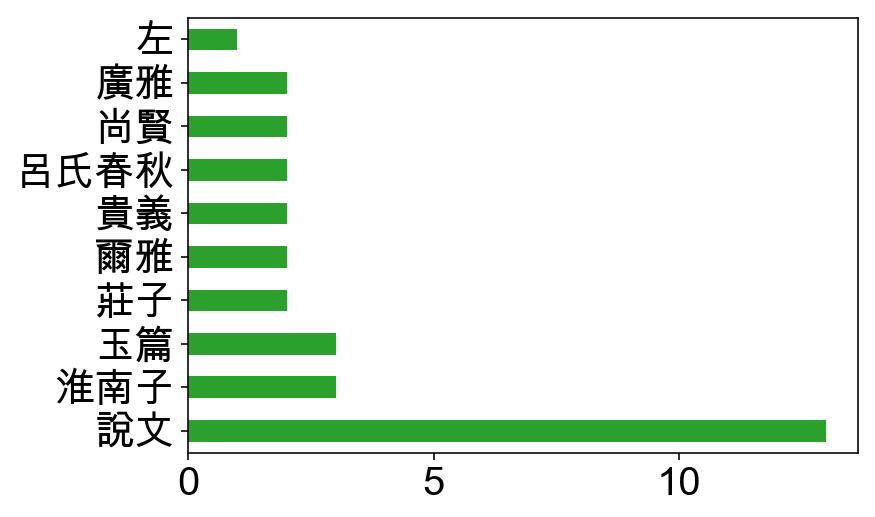

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # retina layout

# Unfortunately some software still has difficulty dealing with Chinese.
# Here we may need to tell matplotlib to use a specific font containing Chinese characters.
# If your system doesn't display the Chinese text in the graph below, you may need to specify a different font name.
import platform
if platform.system() == 'Darwin':   # I.e. if we're running on Mac OS X
    mpl.rcParams['font.family'] = "Arial Unicode MS" 
else:
    mpl.rcParams['font.family'] = "SimHei"
    
mpl.rcParams['font.size'] = 20

# The interesting stuff happens here:

s = pd.Series(match_count)
s.sort_values(0, False, inplace=True)
s = s[:10]
s.plot(kind='barh', color='C2');

Now modify your regex so that you *only* match texts that are cited as pairs of book title and chapter, i.e. you should *only* match cases like "《呂氏春秋·順民》" (and not 《呂氏春秋》), and capture into a group the full title ("呂氏春秋·順民" in this example). This may be harder than it looks! You will need to be careful that your regex does not sometimes match too much text.

Re-run the above programs to find out (and graph) which *chapters* of which texts are most frequently cited in this way by this commentary.

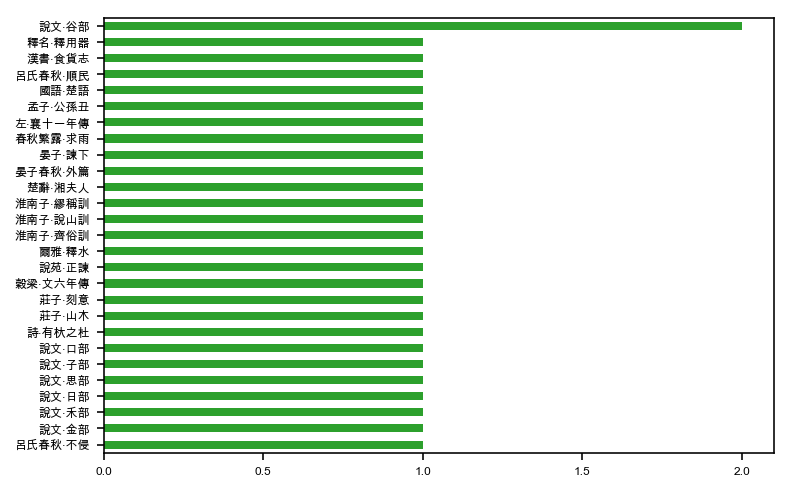

In [27]:
# You code goes here!
# I just want to try more functional programmings
match_count = {term : test_input.count(term) 
     for term in set(list(filter(lambda x: '·' in x, 
        re.findall(r"《([^》]{1,})》", test_input))))}

# making pandas series out of dictionary
s = pd.Series(match_count)
s.sort_values().plot(kind='barh', color='C2', fontsize=6)

Replacing and Splitting with Regexes
----

As well as finding things, regexes are ideal for other very useful tasks including **replacing** and **splitting** textual data.

For example, we saw in the last notebook cases where it would be easier to process a text without any punctuation in it. We can easily match **all** punctuation using a regex, and once we know how to search and replace, we can just replace each matched piece of punctuation with a blank string to get an unpunctuated text.

We can do a simple search-and-replace using a regex like this:

In [28]:
import re

input_text = "道可道，非常道。"
print(re.sub(r"道", r"名", input_text))

名可名，非常名。


For very simple regexes that don't use any special regex characters, this gives exactly the same result as replace(). But because we can specify patterns, we can do much more powerful replacements.

In [29]:
input_text = "道可道，非常道。"
print(re.sub(r"[。，]", r"", input_text))

道可道非常道


Of course, as usual the power of this is that we can quickly do it for however much data we like:

In [30]:
laozi = gettextasstring("ctp:dao-de-jing")
print(re.sub(r"[。，；？：！、]", r"", laozi))

道可道非常道名可名非常名無名天地之始有名萬物之母故常無欲以觀其妙常有欲以觀其徼此兩者同出而異名同謂之玄玄之又玄衆妙之門

天下皆知美之為美斯惡已皆知善之為善斯不善已故有無相生難易相成長短相較高下相傾音聲相和前後相隨是以聖人處無為之事行不言之教萬物作焉而不辭生而不有為而不恃功成而弗居夫唯弗居是以不去

不尚賢使民不爭不貴難得之貨使民不為盜不見可欲使心不亂是以聖人之治虛其心實其腹弱其志強其骨常使民無知無欲使天知者不敢為也為無為則無不治

道沖而用之或不盈淵兮似萬物之宗挫其銳解其紛和其光同其塵湛兮似或存吾不知誰之子象帝之先

天地不仁以萬物為芻狗聖人不仁以百姓為芻狗天地之間其猶橐籥乎虛而不屈動而愈出多言數窮不如守中

谷神不死是謂玄牝玄牝之門是謂天地根綿綿若存用之不勤

天長地久天地所以能長且久者以其不自生故能長生是以聖人後其身而身先外其身而身存非以其無私耶故能成其私

上善若水水善利萬物而不爭處衆人之所惡故幾於道居善地心善淵與善仁言善信正善治事善能動善時夫唯不爭故無尤

持而盈之不如其已揣而銳之不可長保金玉滿堂莫之能守富貴而驕自遺其咎功遂身退天之道

載營魄抱一能無離乎專氣致柔能嬰兒乎滌除玄覽能無疵乎愛民治國能無知乎天門開闔能為雌乎明白四達能無知乎生之畜之生而不有為而不恃長而不宰是謂玄德

三十輻共一轂當其無有車之用埏埴以為器當其無有器之用鑿戶牖以為室當其無有室之用故有之以為利無之以為用

五色令人目盲五音令人耳聾五味令人口爽馳騁田獵令人心發狂難得之貨令人行妨是以聖人為腹不為目故去彼取此

寵辱若驚貴大患若身何謂寵辱若驚寵為下得之若驚失之若驚是謂寵辱若驚何謂貴大患若身吾所以有大患者為吾有身及吾無身吾有何患故貴以身為天下若可寄天下愛以身為天下若可託天下

視之不見名曰夷聽之不聞名曰希搏之不得名曰微此三者不可致詰故混而為一其上不皦其下不昧繩繩不可名復歸於無物是謂無狀之狀無物之象是謂惚恍迎之不見其首隨之不見其後執古之道以御今之有能知古始是謂道紀

古之善為士者微妙玄通深不可識夫唯不可識故強為之容豫兮若冬涉川猶兮若畏四鄰儼兮其若容渙兮若冰之將釋敦兮其若樸曠兮其若谷混兮其若濁孰能濁以靜之徐清孰能安以久動之徐生保此道者不欲盈夫唯不盈故能蔽不新成

致虛極守靜篤萬物並作吾以觀復夫物芸芸各復歸其根歸根曰靜是謂復命復命曰常知常曰明不知常妄作凶知常容容乃公公乃王王乃天天乃道道乃久沒身不殆


Another useful aspect is that we can use data from regex groups that we matched within our replacement. This makes it easy to write replacements that do things like add some particular string before or after something we want to match. This example finds any punctuation character, puts it in regex group 1, and then replaces it with regex group 1 followed by a return character - in other words, it adds a line break after every punctuation character.

In [31]:
laozi = "上德不德，是以有德；下德不失德，是以無德。上德無為而無以為；下德為之而有以為。"
print(re.sub(r"([。，；？：！、])", r"\1\n", laozi))

上德不德，
是以有德；
下德不失德，
是以無德。
上德無為而無以為；
下德為之而有以為。



Regexes and text files
----

Regular expressions can be very useful when we want to transform text from one format to another, or when we want to read text from a file and it isn't in the format we want.

In this section, instead of using the ctext.org API, we will experiment with a text from Project Gutenberg. Before starting, [download the plain text UTF-8 file from the website](http://www.gutenberg.org/files/23938/23938-0.txt) and save it on your computer as a file called "mulan.txt". You should save this in the same folder as this Jupyter notebook (.ipynb) file.

*Note: you don't have to save files in the same folder as your Jupyter notebook, but if you save them somewhere else, when opening the file you will need to tell Python the full path to your file instead of just the filename - e.g. "C:\Users\user\Documents\mulan.txt" instead of just "mulan.txt".*

In [32]:
file = open("mulan.txt", "r", encoding="utf-8")
data_from_file = file.read()
file.close()

One practical issue when dealing with a lot of data in a string is that printing it to the screen so we can see what's happening in our program may take up a lot of space. One thing we can do is to just print a substring - i.e. only print the first few hundred or so characters:

In [33]:
print(data_from_file[0:700])

﻿The Project Gutenberg EBook of Mu Lan Ji Nu Zhuan, by Anonymous

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Mu Lan Ji Nu Zhuan

Author: Anonymous

Editor: Anonymous

Release Date: December 20, 2007 [EBook #23938]

Language: Chinese

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK MU LAN JI NU ZHUAN ***










序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，
求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，
或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其
難也。性命之理，有不悟性根者，有不知命蒂者，有修性


One thing that will be handy is if we can delete the English blurb at the top of this file automatically. There are several ways we could do this. One way is to use a negative character class - matching everything *except* some set of characters - to match all characters that are non-Chinese, and delete them.

The `re.sub() ` function takes three parameters:
1. The regular expression to match
2. What we want to replace each match with
3. The string we want to do the matching in
It returns a new string containing the result after making the substitution.

[The example below also makes use of another kind of special syntax in a character class: we can match a *range* of characters by their Unicode codepoint. Here we match everything from U+25A1 through U+FFFF, all of which are Chinese characters. Don't worry too much about the contents of this regex - we won't need to write regexes like this most of the time.]

In [34]:
new_data = re.sub(r'[^\n\r\u25A1-\uFFFF]', "", data_from_file)
print(new_data[0:700])

﻿






























序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，
求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，
或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其
難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而
後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性
命，而獨無所不盡也哉！

　　予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書
》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武
昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳
情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇
女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，
又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而
人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武
聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

　　　　　　書於滬江梅花書館南窗之下



第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元
道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太
傅，賜爵趙公。晚年修道，煉性登仙。蓋先生盛代奇人，故能識奇中奇人，


We've got rid of the English text, but we've now got too many empty lines. Depending on what data is in the text, we might want to remove all the line breaks... but in this case there are some things like chapter titles that are best kept on separate lines so we can tell where the chapters begin and end.

Remember: "\n" means "one line break", and "{3,}" will match 3 or more of something one after the other (and as many times as possible).

In [35]:
without_spaces = re.sub(r'\n{3,}', "\n\n", new_data)  # This regex matches three or more line breaks, and replaces them with two
print(without_spaces[0:700])

﻿

序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，
求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，
或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其
難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而
後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性
命，而獨無所不盡也哉！

　　予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書
》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武
昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳
情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇
女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，
又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而
人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武
聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

　　　　　　書於滬江梅花書館南窗之下

第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元
道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太
傅，賜爵趙公。晚年修道，煉性登仙。蓋先生盛代奇人，故能識奇中奇人，保全奇中奇
人。奇中奇人為誰？即朱氏木蘭也。

　　木蘭女年十


**Exercise 7**: (*Harder*) Make another substitution using a regex which removes *only* the line breaks within a paragraph (and does not remove linebreaks before and after a chapter title). The output should look like this:

    序

    嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性命，而獨無所不盡也哉！

      予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

          書於滬江梅花書館南窗之下

Hint: Think about what you need to match to make the change. You may need to include some of the things that your regex matches in the replacement using references (i.e. \1, \2, etc.).

In [36]:
without_spaces2 = re.sub(r'([^\n])\n([^\n])', r'\1\2', without_spaces)
print(without_spaces2[0:700])

﻿

序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性命，而獨無所不盡也哉！

　　予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

　　　　　　書於滬江梅花書館南窗之下

第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太傅，賜爵趙公。晚年修道，煉性登仙。蓋先生盛代奇人，故能識奇中奇人，保全奇中奇人。奇中奇人為誰？即朱氏木蘭也。

　　木蘭女年十四，孝心純篤。親衰而病，適軍令


**Exercise 8**: The text contains comments in it which we might want to delete before doing further processing or calculating any statistics. Create a regex substitution which removes each of these comments.

Example comment: ...居於湖廣黃州府西陵縣__（今之黃陂縣）__雙龍鎮。 => should become ...居於湖廣黃州府西陵縣雙龍鎮。

*Make sure to check that your regex does not remove too much text!*

In [37]:
without_comments = re.sub(r'[（](.{1,})[）]', r'', without_spaces2)
print(without_comments[0:1000])

﻿

序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性命，而獨無所不盡也哉！

　　予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

　　　　　　書於滬江梅花書館南窗之下

第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太傅，賜爵趙公。晚年修道，煉性登仙。蓋先生盛代奇人，故能識奇中奇人，保全奇中奇人。奇中奇人為誰？即朱氏木蘭也。

　　木蘭女年十四，孝心純篤。親衰而病，適軍令至，女扮男粧，代父從征，十三年而回，無人知曉，又能居喪如禮，全命全真，豈非奇中奇人。然木有根本，水有源流，若不敘其祖宗何人，桑梓何處，何為忠孝，何為勇烈，則徒一木蘭女也。

　　木蘭祖父朱盈川，名若虛，道號實夫。祖母黃氏，名儀貞，居於湖廣黃州府西陵縣雙龍鎮。這朱若虛天性至孝，善事父母，勤儉持家，和平處世。春耕秋讀，積日而月，積月而歲，不數年竟至鉅富。當時隋朝文帝下詔求賢，屢舉孝廉。若虛聞知越王楊素、太傅宇文化及等，專權用事，祇推親老，不肯應詔。惟愛日惜陰，以事父母。遇父母稍有未適之處，便痛加責刻，手書一詩，懸於中堂以自勉。

　　詩曰：

　　父母養育恩，匪祇如天地。

　　天地生萬物，父母獨

**Exercise 9**: Experiment with writing regexes to list things that look like chapter titles in the text. There are several ways this can be done. (There are 32 numbered chapters in this text.)

In [38]:
for match in re.finditer(r"[\n][\n](第.{1,}回.{1,})[\n][\n]", without_spaces2):
    matched_text = match.group(1)
    print(matched_text)

第一回朱若虛孝弟全天性　朱天錫聰明識童謠
第二回竇忠怒擊虎頭牌　朱盈夢會痘神女
第三回入龍宮凡夫行雨　酬茶恩義士封屍
第四回授天書蛟精返窟　謁越王女俠盜令
第五回彈寶鋏紅絹說奇人　畫三策李靖獻良馬
第六回評花卉盈川師李靖　觀書法若虛薦尉遲
第七回魏徵揮金逢傑士　若虛解夢識天機
第八回木蘭山天祿三祈嗣　大霧頂喪吾初聆法
第九回觀音寺喪吾說法　白蓮池九賢賦詩
第十回朱若虛遺言囑子媳　尉遲恭奉旨造西寺
第十一回天祿貧受千戶職　木蘭劍劈白狐精
第十二回香元參禪難喪吾　太宗降詔討突厥
第十三回憐親病孝女從征　聽波聲木蘭賦詩
第十四回占營運李靖識奇人　餞軍儀青蓮談敵國
第十五回黑水渡焦周回上國　五臺山靖松贈明駝
第十六回界牌關額保告急　五狼關頡和被擒
第十七回老頡和再搶五狼　小木蘭三敗番兵
第十八回木箕三敗誘唐兵　木蘭黑夜襲界牌
第十九回宛邱城唐將報捷　石子鋪寶林被擒
第二十回金牛關康和換將　五狼鎮木蘭裝神
第二十一回金沙谷木箕自刎　康和阿仍復帥印
第二十二回康和下令赦番兵　尉遲冒雪取金牛
第二十三回太宗降詔責尉遲　突厥出榜募賢士
第二十四回真孝女遭厄刎頸　鐵道人遺書誅妖
第二十五回突厥稱臣降中國　木蘭舉酒論奇門
第二十六回靖松封書謝故人　太宗賜爵酬將士
第二十七回天祿焚香祝神明　喪吾懸書試門人
第二十八回木蘭險遭花棍厄　太宗敕賜功臣宴
第二十九回伍登省親走湖廣　太宗慕賢賜詔書
第三十回木蘭初上陳情表　喪吾吟偈上西天
第三十一回木蘭二上陳情表　太宗屈殺伍娘子
第三十二回木蘭三上陳情表　太宗建廟旌賢良


* Next, use your chapter-detecting regex to add immediately before each chapter the text "CHAPTER_STARTS_HERE".

In [39]:
# Your code goes here!
without_space_chapter = re.sub(
    r'([\n][\n])(第.{1,}回.{1,})([\n][\n])', 
    r'\1CHAPTER_STARTS_HERE \2\3', without_spaces2)
print(without_space_chapter[:700])

﻿

序

嘗思人道之大，莫大於倫常；學問之精，莫精於性命。自有書籍以來，所載傳人不少，求其交盡乎倫常者鮮矣，求其交盡乎性命者益鮮矣。蓋倫常之地，或盡孝而不必兼忠，或盡忠而不必兼孝，或盡忠孝而安常處順，不必兼勇烈。遭際未極其變，即倫常未盡其難也。性命之理，有不悟性根者，有不知命蒂者，有修性命而旁歧雜出者，有修性命而後先倒置者。涵養未得其中，即性命未盡其奧也。乃木蘭一女子耳，擔荷倫常，研求性命，而獨無所不盡也哉！

　　予幼讀《木蘭詩》，觀其代父從軍，可謂孝矣；立功絕塞，可謂忠矣。後閱《唐書》，言木蘭唐女，西陵人，嫻弓馬，諳韜略，轉戰沙漠，累大功十二，何其勇也。封武昭將軍，凱旋還里。當時筮者謂致亂必由武姓，讒臣嫁禍武昭，詔徵至京。木蘭具表陳情，掣劍剜心，示使者，目視而死。死後，位證雷部大神，何其烈也。去冬閱《木蘭奇女傳》，復知其幼而領悟者性命也，長而行持者性命也。且通部議論極精微，極顯豁，又無非性命之妙諦也。盡人所當盡，亦盡人所難盡。惟其無所不盡，則亦無所不奇。而人奇，行奇，事奇，文奇，讀者莫不驚奇叫絕也。此書相傳為奎斗馬祖所演，卷首有武聖帝序。今序已失，同人集貲付梓。書成，爰敘其緣起如此。

　　　　　　書於滬江梅花書館南窗之下

CHAPTER_STARTS_HERE 第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太傅，賜爵趙公。晚年修道，煉性登仙。蓋先生盛代奇人，故能識奇中奇人，保全奇中奇人。奇中奇人為誰？即朱氏木蘭也。

　　


Lastly, we can use a regex to split a string variable into a Python list using the `re.split()` function. At any point in the string where the specified regex is matched, the data is split into pieces. For instance:

In [40]:
laozi = "上德不德，是以有德；下德不失德，是以無德。上德無為而無以為；下德為之而有以為。上仁為之而無以為；上義為之而有以為。上禮為之而莫之應，則攘臂而扔之。故失道而後德，失德而後仁，失仁而後義，失義而後禮。"
laozi_phrases = re.split(r"[。，；]", laozi)
for number in range(0, len(laozi_phrases)):
    print(str(number) + ". " + laozi_phrases[number])

0. 上德不德
1. 是以有德
2. 下德不失德
3. 是以無德
4. 上德無為而無以為
5. 下德為之而有以為
6. 上仁為之而無以為
7. 上義為之而有以為
8. 上禮為之而莫之應
9. 則攘臂而扔之
10. 故失道而後德
11. 失德而後仁
12. 失仁而後義
13. 失義而後禮
14. 


Use `re.split()` to split your full text into a Python list, in which each chapter is one list item. (For simplicity you can ignore things like the preface etc.)

In [41]:
# Your code goes here!
# Call your list variable "chapters"
chapters = re.split(r"CHAPTER_STARTS_HERE", without_space_chapter)
print(chapters[1][:100])
print(chapters[2][:100])

 第一回朱若虛孝弟全天性　朱天錫聰明識童謠

　　古樂府所載《木蘭辭》，乃唐初國師李藥師所作也。藥師名靖，號青蓮，又號三元道人。先生少日，負經天緯地之才，抱治國安民之志，佐太宗平隋亂，開唐基，官拜太傅
 第二回竇忠怒擊虎頭牌　朱盈夢會痘神女

　　卻說楊知縣見府尊意思冷落，鼠竄而回。進了公館，各人個個無言。次日早起，用了幾樣點心，又引著八人到轅門聽候。祇見眾人圍做一堆，口稱：「可惜！可惜！」知縣心中


Now we have this data in a Python list, we can do things to each chapter individually. We can also put each of the chapters into its own text file - this is something we will sometimes need to do when we want to use other tools that are not in Python.

In [ ]:
for chapternumber in range(0, len(chapters)):
    file = open("mulan-part-" + str(chapternumber).zfill(2) + ".txt", "w", encoding="utf-8")
    file.write(chapters[chapternumber] + "\n")
    file.close()

**Further reading:**
* The browser-based [Text Tools](https://ctext.org/plugins/texttools/#help) plugin for [ctext.org](http://ctext.org) supports regular expressions - an [online tutorial](https://dsturgeon.net/texttools/) for the plugin is available, which describes how to use it to [investigate patterns with regexes](https://dsturgeon.net/texttools/#regex).

<div style="float: right;"><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a></div>